In [2]:
reviews1 = read.csv('brand_reviews.csv',sep='\t')

In [86]:
head(reviews1)

X,Brand,Reviews
0,sony,"<p>Hi DPR,<br/>the original video links are dead, please check...</p>"
1,sony,<p>Sold American ! lol</p>
2,sony,"<p>Since I already have the RX100M3, I'll wait one more year for the DSC-RX10M4 - to leap frog every other year. It'll probably have a flip-screen, improved auto focus, longer zoom, touch screen.</p>"
3,sony,"<p>Q: Been looking at the RX10 &amp; now the Rx10-II ups it to 4k, etc. Wish the screen flipped 180 for shooting video. (Biological_Viewfinder) Curious if you stand by your switch from interchangeable lens cameras to this one. I travel frequently and really don't want to pack a bag of lenses. (I will primarily use the camera for headshot photography, some travel photography, live events, and would like to shoot a short film with it. I know I'm asking for a Swiss Army Knife of a camera) I used to shoot everything with a small Lumix FZ cam and have a good eye, and am getting hired off those photos, but I need better quality. Am I doing myself a disservice by not getting an interchangeable lens camera? (Also looking at the comparable Lumix 1000 with flip screen and longer lens, but it doesn't maintain 2.8 like the Sony which, I heard, gets better bokeh with the built in ND Filter. Still learning the technical aspects of photography. Thanks and Happy Holidays.</p>"
4,sony,<p>I hope Sony try to improve the AF. <br/>and consider lowering the price so more will buy</p>
5,sony,<p>I'm thinking of buying this camera primarily for the video since I own an A77ii for stills. Is there a dedicated video camera for $1300 that is as good as this?</p>


In [3]:
xy = paste(reviews1$Brand,reviews1$Reviews)

In [4]:
library('tm')

Loading required package: NLP


In [5]:
head(xy)

[1] "sony <p>Hi DPR,<br/>the original video links are dead, please check...</p>"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
[2] "sony <p>Sold American ! lol</p>"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
[3] "sony <p>Since I already have the RX100M3, I'll wait one more year for the DSC-RX10M4 - to leap frog every other year.  It'll probably have a flip-screen, improved auto focus, longer zoom, touch screen.</p>"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[4] "sony <p>Q: Been looking at the RX10 &amp; now the Rx10-II ups it to 4k, etc. Wish the screen flipped 180 for shooting video. (Biological_Viewfinder) Curious if you stand by your switch from interchangeable lens cameras to this one. I travel frequently and really don't want to pack a bag of lenses. (I will primarily use the camera for headshot photography, some travel photography, live events, and would like to shoot a short film with it. I know I'm asking for a Swiss Army Knife of a camera) I used to shoot everything with a small Lumix FZ cam and have a good eye, and am getting hired off those photos, but I need better quality. Am I doing myself a disservice by not getting an interchangeable lens camera? (Also looking at the comparable Lumix 1000 with flip screen and longer lens, but it doesn't maintain 2.8 like the Sony which, I heard, gets better bokeh with the built in ND Filter. Still learning the technical aspects of photography. Thanks and Happy Holidays.</p>"
[5] "sony <p>I hope Sony try to improve the AF. <br/>and

In [6]:
myCorpus <- Corpus(VectorSource(xy))


In [7]:
myCorpus <- tm_map(myCorpus, content_transformer(tolower))

Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
“transformation drops documents”

In [8]:
myCorpus <- tm_map(myCorpus, removePunctuation)

Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
“transformation drops documents”

In [9]:
myCorpus[[5]]$content

[1] "sony pi hope sony try to improve the af brand consider lowering the price so more will buyp"

In [15]:
myCorpus <- tm_map(myCorpus, removeNumbers)

Warning message in tm_map.SimpleCorpus(myCorpus, removeNumbers):
“transformation drops documents”

In [10]:
myStopwords <- c(stopwords("english"), "available", "via","br","p",'done')

In [11]:
myCorpus <- tm_map(myCorpus, removeWords, myStopwords)

Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, myStopwords):
“transformation drops documents”

In [12]:
myCorpus[[5]]$content

[1] "sony pi hope sony try  improve  af brand consider lowering  price   will buyp"

In [13]:
myCorpusCopy <- myCorpus

In [14]:
library('SnowballC')

In [15]:
myCorpus <- tm_map(myCorpus, stemDocument)

Warning message in tm_map.SimpleCorpus(myCorpus, stemDocument):
“transformation drops documents”

In [16]:
tdm <- TermDocumentMatrix(myCorpus, control = list(wordLengths = c(1, Inf)))

In [17]:
tdm

<<TermDocumentMatrix (terms: 35633, documents: 22024)>>
Non-/sparse entries: 454221/784326971
Sparsity           : 100%
Maximal term length: 403
Weighting          : term frequency (tf)

In [18]:
freq.terms <- findFreqTerms(tdm, lowfreq=1000)


In [19]:
freq.terms

[1] "soni"    "video"   "focus"   "one"     "year"    "also"    "better" 
 [8] "camera"  "compar"  "dont"    "get"     "good"    "im"      "know"   
[15] "len"     "lens"    "like"    "look"    "need"    "now"     "qualiti"
[22] "realli"  "shoot"   "still"   "use"     "want"    "will"    "pi"     
[29] "price"   "buy"     "think"   "panason" "great"   "say"     "differ" 
[36] "light"   "see"     "sensor"  "point"   "time"    "well"    "just"   
[43] "much"    "new"     "take"    "can"     "fuji"    "make"    "phone"  
[50] "way"     "best"    "canon"   "imag"    "mani"    "nikon"   "peopl"  
[57] "review"  "samsung" "thing"   "even"    "work"    "olympus" "pthe"   
[64] "go"      "na"      "sigma"

In [20]:
idx <- which(dimnames(tdm)$Terms == "r")
inspect(tdm[idx + (0:30), 101:130])

<<TermDocumentMatrix (terms: 31, documents: 30)>>
Non-/sparse entries: 0/930
Sparsity           : 100%
Maximal term length: 15
Weighting          : term frequency (tf)
Sample             :
                 Docs
Terms             101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
  r                 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  recreat           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  wellp             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  backlit           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  ca                0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  characteristicp   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  commend           0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  deserv            0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  fring             0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  highcon

In [21]:
tdm2 <- removeSparseTerms(tdm, sparse = 0.99)
m2 <- as.matrix(tdm2)

In [22]:
tdm.tfidf <- tm::weightTfIdf(tdm2)

In [61]:
#tdm.tfidf <- tm::removeSparseTerms(tdm.tfidf, 0.999) 
tfidf.matrix <- as.matrix(tdm2) 

In [79]:
dist.matrix = proxy::dist(m2, method = "cosine")


# Clustering

In [149]:
clustering.kmeans <- kmeans(tdm2, 12) 

In [150]:
cluster <- clustering.kmeans$cluster

In [151]:
cluster

pleas        soni       video     alreadi       everi       focus 
         10           5           4          10          10           4 
        ill      improv         one     probabl        wait        year 
         10          10          11          10          10          10 
       zoom          4k        also         amp         bag      better 
         10          10           4          10          10          11 
     camera      compar      doesnt        dont         etc     everyth 
          2          10          10           4          10          10 
        eye         get        good       happi          im        know 
         10          11           4          10           4           4 
        len        lens        like        live        look        need 
          9           4           7          10           4           4 
        now       photo photographi     qualiti      realli      screen 
          4           4          10           4           4          10 
      shoot       small       still       thank      travel         use 
          4          10           4          10          10           6 
       want        will        wish          af       brand      consid 
          4          11          10           4          10          10 
       hope       lower          pi       price         tri         buy 
         10          10           4           4          10           4 
        pim        sinc       think      expens         got         ive 
         10          10           4          10          10          10 
    panason      around       choic       great        love  photograph 
          4          10          10           4          10          10 
    purchas         say     serious        sure        talk        that 
         10           4          10          10          10          10 
       cant        list        mode         100     apertur        appl 
         10          10          10          10          10          10 
    correct       cours       didnt      differ         dpr       exact 
         10          10          10           4          10          10 
        far       focal        full        give          id          ii 
         10          10          10          10          10          10 
      light         may        noth     possibl       quick         raw 
          4          10          10          10          10          10 
     result       rx100       sampl         see      sensor       sharp 
         10          10          10           4           1          10 
       shot     similar        size      someon      studio        test 
          4          10          10          10          10          10 
     tripod         two         ago        apsc        back        come 
         10          10          10          10          10          10 
        f28       first         itp        kind       point        quit 
         10          10          10          10           4          10 
       time        well  profession       pthis           1      actual 
          4           4          10          10          10          10 
        bit      bought         day        just        mean        much 
         10          10          10          11          10           4 
       must         new       offer     perform        fast      import 
         10          10          10          10          10          10 
       keep  manufactur       speed        take         can        fact 
         10          10          10           4          11          10 
       fuji        less        make      matter  mirrorless       month 
          4          10           4          10          10          10 
       nice       phone        rang     smaller        tell         way 
         10           4          10          10          10           4 
      anyth       right      someth        best       canon     

In [152]:
size = clustering.kmeans$size

In [153]:
size

[1]   1   1   1  47   1   1   1   1   1 337   6   1

In [60]:
dist.matrix = dist(scale(m2))

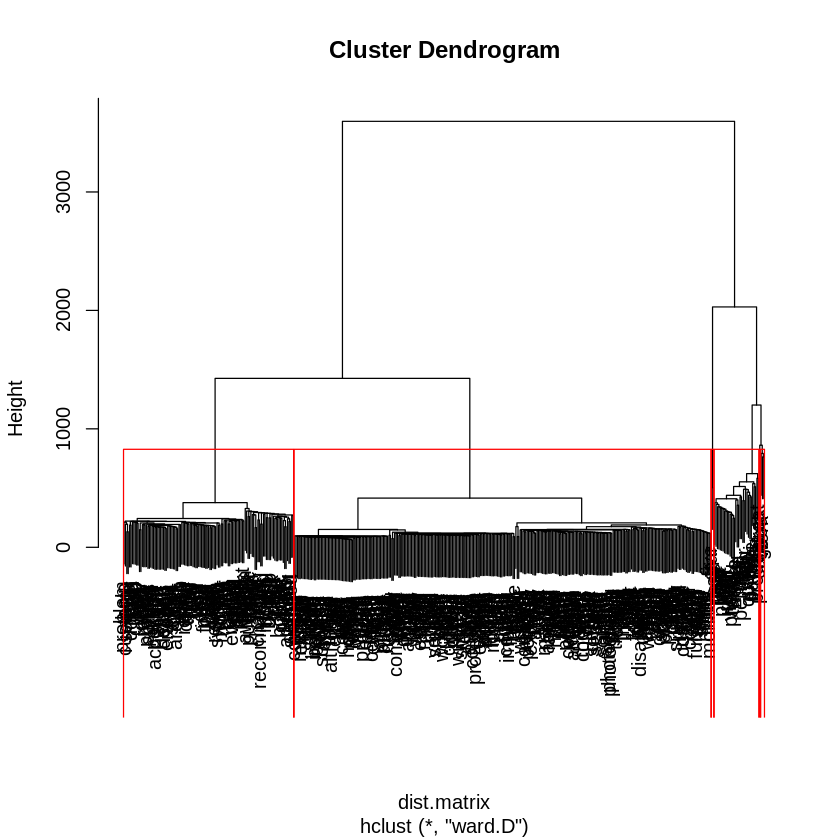

In [36]:
fit <- hclust(dist.matrix, method = "ward.D")

plot(fit)
rect.hclust(fit, k = 6)

In [63]:
install.packages('FactoMineR')

also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Correspondence Analysis

In [1]:
library('FactoMineR')

In [5]:
Sony=c(31,22,31,4,58,43,32,6,7,82,8,1)

In [11]:
nikon    =c(12,14,28,9,61,15,6,72,5,3,16,2)
panasonic =c(24,1,4,0,3,2,5,0,37,2,78,3)
fuji   =c(61,1,0,11,7,31,4,10,3,12,7,3)
canon =c(22,3,4,26,1,6,2,8,5,10,2,0)
kodak =c(2,1,4,3,2,62,5,1,0,6,3,1)
olympus   =c(71,5,1,20,8,4,12,0,41,1,7,3)
casio = c(2,1,4,0,3,2,5,0,1,2,0,1)

In [12]:
xy = data.frame(Sony,nikon,casio,fuji,canon,kodak,olympus,panasonic)

In [13]:
rownames(xy)=c('Battery','Memory','Size','Control','Zoom','Lens','Focus','Flash','Disk','Video','Brightness','Viewfind')

In [14]:
xy

,Sony,nikon,casio,fuji,canon,kodak,olympus,panasonic
Battery,31,12,2,61,22,2,71,24
Memory,22,14,1,1,3,1,5,1
Size,31,28,4,0,4,4,1,4
Control,4,9,0,11,26,3,20,0
Zoom,58,61,3,7,1,2,8,3
Lens,43,15,2,31,6,62,4,2
Focus,32,6,5,4,2,5,12,5
Flash,6,72,0,10,8,1,0,0
Disk,7,5,1,3,5,0,41,37
Video,82,3,2,12,10,6,1,2


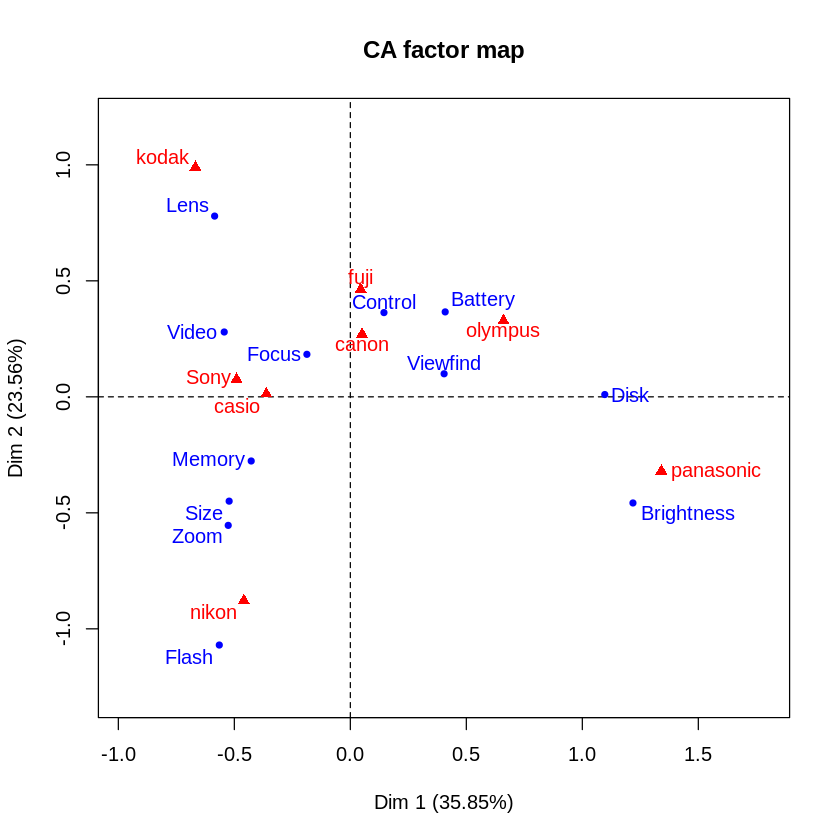

In [15]:
res.ca = CA(xy)

In [16]:
res.ca

**Results of the Correspondence Analysis (CA)**
The row variable has  12  categories; the column variable has 8 categories
The chi square of independence between the two variables is equal to 1489.598 (p-value =  2.1605e-260 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

In [17]:
library("factoextra")
eig.val <- get_eigenvalue(res.ca)
eig.val

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,0.42720408,35.8489386,35.84894
Dim.2,0.28078439,23.5620933,59.41103
Dim.3,0.22344475,18.7504224,78.16145
Dim.4,0.16232682,13.6216964,91.78315
Dim.5,0.05325038,4.4685189,96.25167
Dim.6,0.03415407,2.8660473,99.11772
Dim.7,0.01051398,0.8822831,100.00000


In [117]:
install.packages('factoextra')

also installing the dependencies ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘dendextend’, ‘ggpubr’, ‘ggrepel’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
library('factoextra')

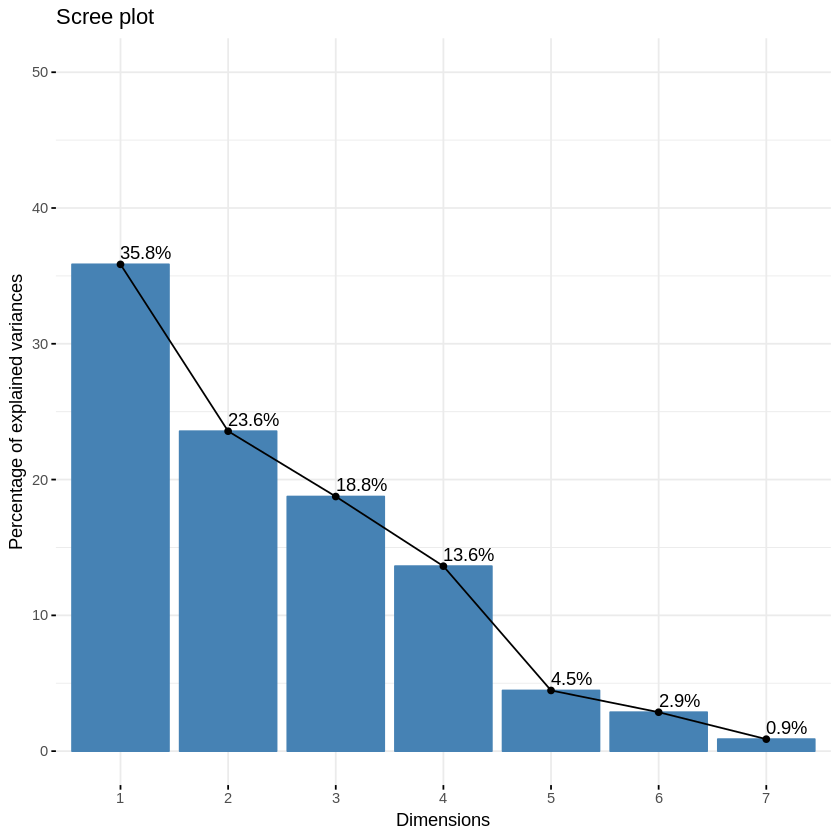

In [19]:
fviz_screeplot(res.ca, addlabels = TRUE, ylim = c(0, 50))


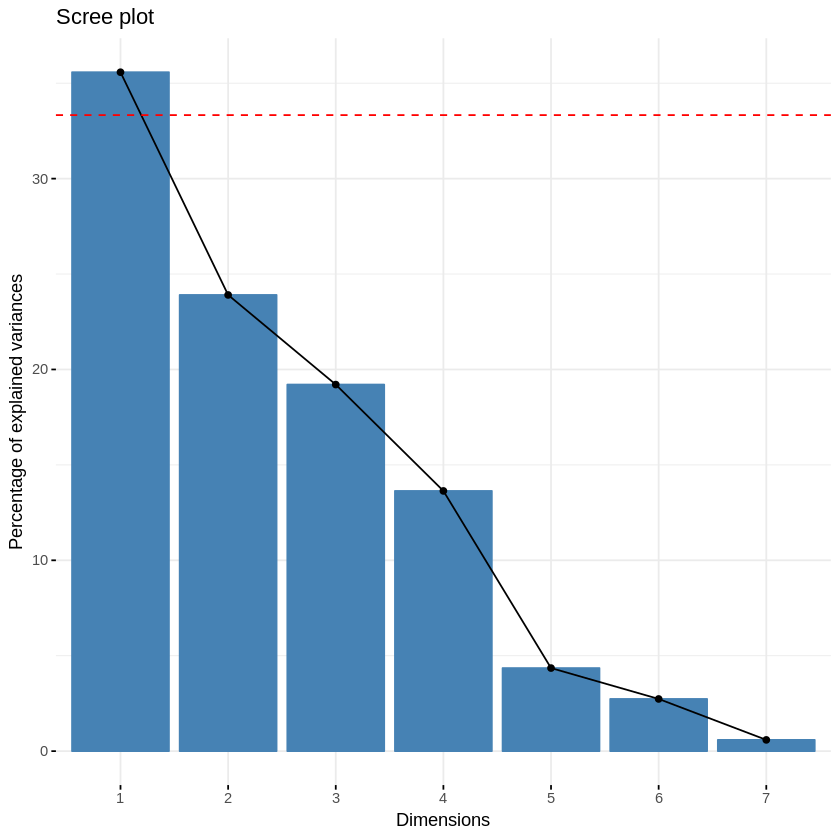

In [144]:
fviz_screeplot(res.ca) +
 geom_hline(yintercept=33.33, linetype=2, color="red")

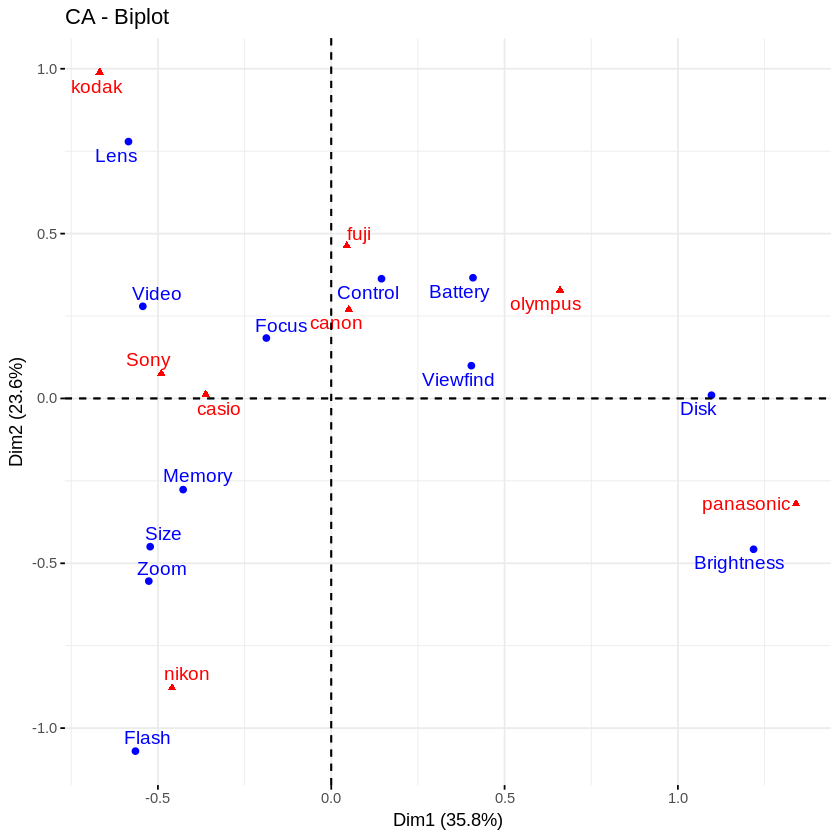

In [20]:
# repel= TRUE to avoid text overlapping (slow if many point)
fviz_ca_biplot(res.ca, repel = TRUE)

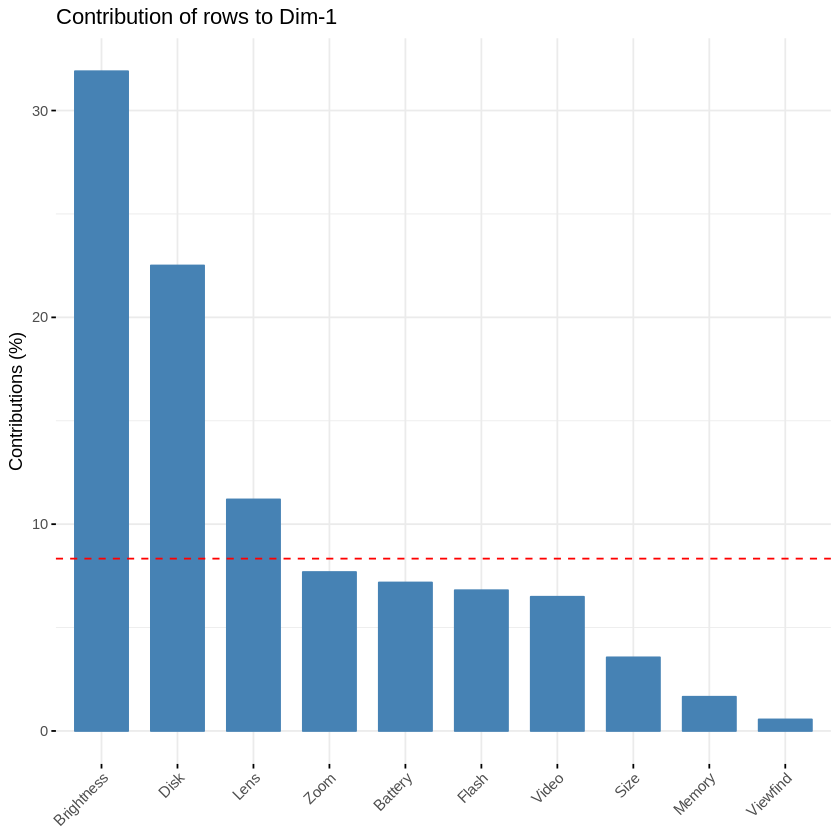

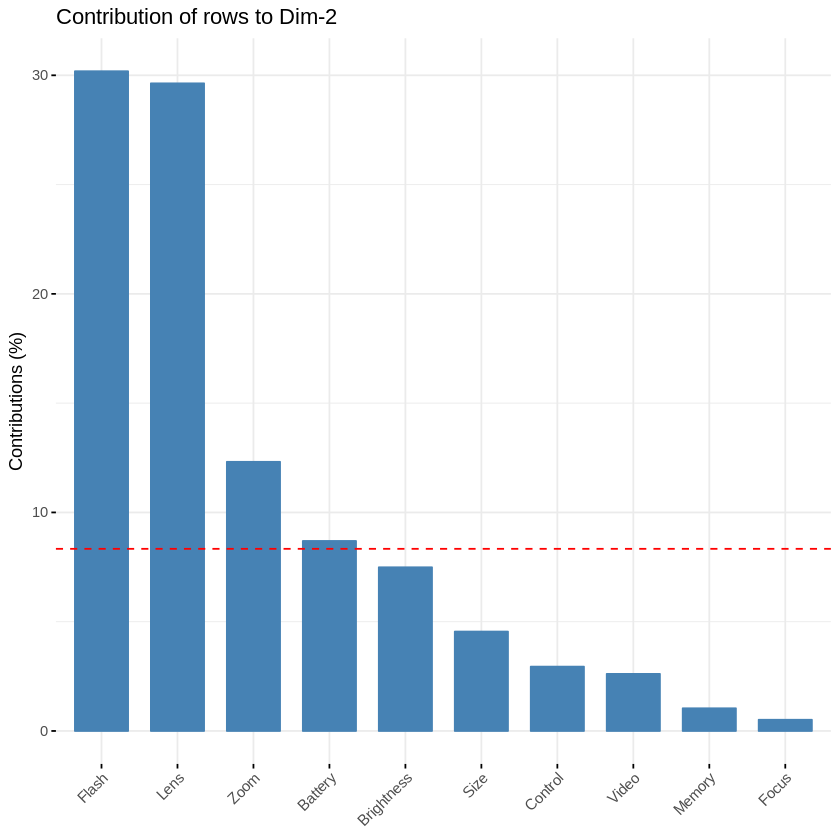

In [154]:
# Contributions of rows to dimension 1
fviz_contrib(res.ca, choice = "row", axes = 1, top = 10)
# Contributions of rows to dimension 2
fviz_contrib(res.ca, choice = "row", axes = 2, top = 10)